In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the images
# The pixel values range from 0 to 255. Dividing by 255 scales them to a range of 0 to 1.
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Convert labels to categorical (one-hot encoding)
# This is necessary because the model outputs probabilities for 10 different classes.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [3]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(512, activation='relu', input_shape=(784,)))

# Second hidden layer
model.add(Dense(256, activation='relu'))

# Dropout layer for regularization (helps prevent overfitting)
model.add(Dropout(0.2))

# Output layer with 10 units (for 10 classes) and softmax activation
# Softmax ensures the output is a probability distribution across the 10 classes.
model.add(Dense(10, activation='softmax'))


C:\Users\hpvic\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Appropriate loss for multi-class classification
              metrics=['accuracy'])


In [5]:
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2 # Use 20% of training data for validation
                    )


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9172 - loss: 0.2764 - val_accuracy: 0.9627 - val_loss: 0.1253
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9699 - loss: 0.1000 - val_accuracy: 0.9703 - val_loss: 0.0960
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9802 - loss: 0.0643 - val_accuracy: 0.9758 - val_loss: 0.0783
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0437 - val_accuracy: 0.9756 - val_loss: 0.0825
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9899 - loss: 0.0318 - val_accuracy: 0.9754 - val_loss: 0.0839


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.9761 - loss: 0.0818

Test accuracy: 0.9761000275611877


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Predicted label for the first test image: 7
True label for the first test image: 7


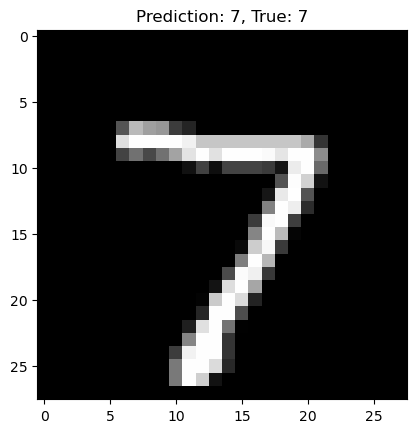

In [7]:
import numpy as np

# Predict the class of the first test image
predictions = model.predict(test_images[:1])
predicted_label = np.argmax(predictions)
true_label = np.argmax(test_labels[:1])

print(f'\nPredicted label for the first test image: {predicted_label}')
print(f'True label for the first test image: {true_label}')

# Optional: Display the image
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f'Prediction: {predicted_label}, True: {true_label}')
plt.show()
